In [1]:
import numpy as np
import pandas as pd

In [2]:
books= pd.read_csv("Books.csv.zip")
books=books[['ISBN','Book-Title','Book-Author','Year-Of-Publication','Publisher']]
books

C:\Users\Asus\AppData\Local\Temp\ipykernel_21480\1593573749.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books= pd.read_csv("Books.csv.zip")


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [3]:
user=pd.read_csv("Users.csv.zip")
user

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


<Axes: >

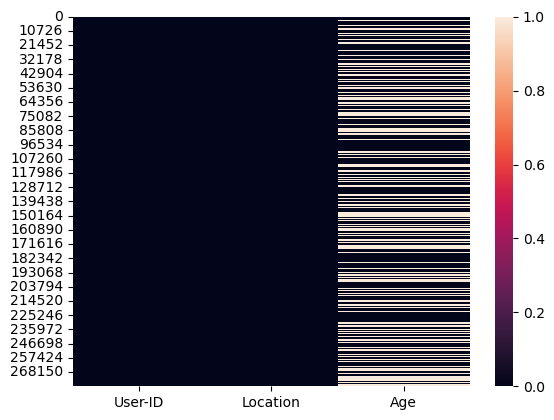

In [4]:
import seaborn as sns
sns.heatmap(user.isnull())

In [5]:
user=user[['User-ID','Location']]
user

,User-ID,Location
0,1,"nyc, new york, usa"
1,2,"stockton, california, usa"
2,3,"moscow, yukon territory, russia"
3,4,"porto, v.n.gaia, portugal"
4,5,"farnborough, hants, united kingdom"
...,...,...
278853,278854,"portland, oregon, usa"
278854,278855,"tacoma, washington, united kingdom"
278855,278856,"brampton, ontario, canada"
278856,278857,"knoxville, tennessee, usa"


In [6]:
rating=pd.read_csv("Ratings.csv.zip")
rating.shape

(1149780, 3)

In [7]:
x=rating.duplicated()
x[x].count()

0

In [8]:
y=rating['User-ID'].value_counts()>100
efficient_users=y[y]
efficient_users.shape

(1825,)

In [9]:
type(efficient_users)
efficient_users

User-ID
11676     True
198711    True
153662    True
98391     True
35859     True
          ... 
40553     True
39345     True
266283    True
189666    True
140879    True
Name: count, Length: 1825, dtype: bool

In [10]:
ratings=rating.merge(efficient_users, on='User-ID')
ratings

,User-ID,ISBN,Book-Rating,count
0,276925,0006511929,0,True
1,276925,002542730X,10,True
2,276925,0060520507,0,True
3,276925,0060930934,0,True
4,276925,0060951303,0,True
...,...,...,...,...
656600,276680,1884910033,0,True
656601,276680,1888173408,7,True
656602,276680,1888173564,8,True
656603,276680,1888173572,0,True


In [11]:
ratings=ratings[['User-ID','ISBN','Book-Rating']]
ratings

,User-ID,ISBN,Book-Rating
0,276925,0006511929,0
1,276925,002542730X,10
2,276925,0060520507,0
3,276925,0060930934,0
4,276925,0060951303,0
...,...,...,...
656600,276680,1884910033,0
656601,276680,1888173408,7
656602,276680,1888173564,8
656603,276680,1888173572,0


In [12]:
ratings['User-ID'].value_counts()

User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
70183       101
65584       101
238186      101
39345       101
20119       101
Name: count, Length: 1825, dtype: int64

In [13]:
ratings['ISBN'].value_counts()

ISBN
0971880107    615
0316666343    430
0385504209    324
0060928336    305
044021145X    276
             ... 
0672316897      1
1555471587      1
0673153304      1
0675201950      1
1888173408      1
Name: count, Length: 239924, dtype: int64

In [14]:
x=ratings['ISBN'].value_counts()>50
good_books=x[x]
good_books

ISBN
0971880107    True
0316666343    True
0385504209    True
0060928336    True
044021145X    True
              ... 
0425128164    True
0515120006    True
0345354621    True
0451190521    True
0451137965    True
Name: count, Length: 812, dtype: bool

In [15]:
good_books.shape

(812,)

In [16]:
final_ratings=ratings.merge(good_books,on='ISBN')
final_ratings=final_ratings[['User-ID','ISBN','Book-Rating']]
final_ratings.shape

(71393, 3)

In [17]:
final_ratings.shape

(71393, 3)

In [18]:
type(final_ratings)

pandas.core.frame.DataFrame

In [19]:
final_ratings['ISBN'].value_counts()

ISBN
0971880107    615
0316666343    430
0385504209    324
0060928336    305
044021145X    276
             ... 
0425131769     51
0451142934     51
0425165701     51
0451137965     51
0380817691     51
Name: count, Length: 812, dtype: int64

In [20]:
final_ratings['User-ID'].value_counts()

User-ID
11676     710
35859     377
76352     365
16795     336
153662    297
         ... 
107645      1
214920      1
119248      1
261379      1
140069      1
Name: count, Length: 1774, dtype: int64

In [21]:
final_ratings

,User-ID,ISBN,Book-Rating
0,276925,002542730X,10
1,276925,0316666343,0
2,276925,0385504209,8
3,276925,0804106304,0
4,276925,0971880107,0
...,...,...,...
71388,276680,0440221595,8
71389,276680,0446670251,0
71390,276680,0670030643,0
71391,276680,0679731725,0


In [22]:
final_ratings=final_ratings.merge(user,on='User-ID')
#final_ratings.drop('Location_y',axis=1,inplace=True)
final_ratings

,User-ID,ISBN,Book-Rating,Location
0,276925,002542730X,10,"barcelona, barcelona, spain"
1,276925,0316666343,0,"barcelona, barcelona, spain"
2,276925,0385504209,8,"barcelona, barcelona, spain"
3,276925,0804106304,0,"barcelona, barcelona, spain"
4,276925,0971880107,0,"barcelona, barcelona, spain"
...,...,...,...,...
71388,276680,0440221595,8,"hopewell junction, new york, usa"
71389,276680,0446670251,0,"hopewell junction, new york, usa"
71390,276680,0670030643,0,"hopewell junction, new york, usa"
71391,276680,0679731725,0,"hopewell junction, new york, usa"


In [23]:
cleand_data=final_ratings.merge(books,on='ISBN')
cleand_data

,User-ID,ISBN,Book-Rating,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276925,002542730X,10,"barcelona, barcelona, spain",Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
1,276925,0316666343,0,"barcelona, barcelona, spain",The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
2,276925,0385504209,8,"barcelona, barcelona, spain",The Da Vinci Code,Dan Brown,2003,Doubleday
3,276925,0804106304,0,"barcelona, barcelona, spain",The Joy Luck Club,Amy Tan,1994,Prentice Hall (K-12)
4,276925,0971880107,0,"barcelona, barcelona, spain",Wild Animus,Rich Shapero,2004,Too Far
...,...,...,...,...,...,...,...,...
71095,276680,0425092917,8,"hopewell junction, new york, usa",The Accidental Tourist,Anne Tyler,1994,Berkley Publishing Group
71096,276680,0440221595,8,"hopewell junction, new york, usa",The Glass Lake,Maeve Binchy,1996,Dell
71097,276680,0446670251,0,"hopewell junction, new york, usa",The Virgin Suicides,Jeffrey Eugenides,1994,Warner Books
71098,276680,0670030643,0,"hopewell junction, new york, usa",The Eyre Affair (Alex Awards (Awards)),Jasper Fforde,2002,Viking Books


In [24]:
pivot_data=cleand_data.pivot_table(columns='User-ID',index='Book-Title',values='Book-Rating')
pivot_data=pivot_data.fillna(0)
pivot_data

User-ID,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,276018,276463,276680,276925,277427,277478,277639,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
from scipy.sparse import csr_matrix
sparse_data=csr_matrix(pivot_data)
sparse_data.shape

(772, 1774)

In [26]:
from sklearn.neighbors import NearestNeighbors
model=NearestNeighbors(algorithm='brute')

In [27]:
model.fit(sparse_data)

NearestNeighbors(algorithm='brute')

In [47]:
 distancs,suggestions = model.kneighbors(pivot_data.iloc[237,:].values.reshape(1,-1), n_neighbors=6)
 suggestions

array([[237, 129,  37, 389, 380, 184]], dtype=int64)

In [48]:
 for i in range(len(suggestions)):
     print(pivot_data.index[suggestions[i]])

Index(['Hannibal', 'Contagion', 'Abduction', 'Pleading Guilty', 'Outbreak',
       'Executive Orders (Jack Ryan Novels)'],
      dtype='object', name='Book-Title')


In [45]:
def book_recommender(book_name):
    index=np.where(pivot_data.index==book_name)[0][0]
    distancs,suggestions = model.kneighbors(pivot_data.iloc[index,:].values.reshape(1,-1), n_neighbors=6)
    for i in range(1,len(suggestions[0])):
        print(pivot_data.index[suggestions[0][i]])
    

In [46]:
book_recommender('Zoya')

Secrets
Fine Things
Morning, Noon &amp; Night
Kaleidoscope
Tom Clancy's Op-Center: Games of State (Tom Clancy's Op Center (Paperback))
